In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanicdata = pd.read_csv('titanic.csv' , sep = '\t')

In [3]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [5]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [6]:
titanicdata.groupby(['Sex','Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            9
        2       1           11
                0            1
        3       1           20
                0           15
male    1       0           18
                1            3
        2       0           15
                1            3
        3       0           53
                1            8
Name: Survived, dtype: int64

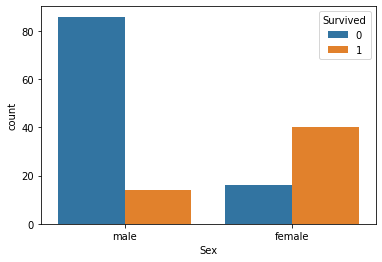

In [7]:
sns.countplot(x = 'Sex' , data = titanicdata  , hue = 'Survived')
plt.show()

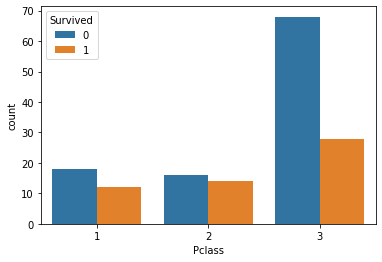

In [8]:
sns.countplot(x = 'Pclass' , data = titanicdata  , hue = 'Survived')
plt.show()

In [9]:
titanicdata.groupby(['Sex','Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            9
        2       1           11
                0            1
        3       1           20
                0           15
male    1       0           18
                1            3
        2       0           15
                1            3
        3       0           53
                1            8
Name: Survived, dtype: int64

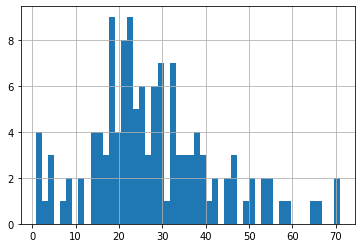

In [10]:
titanicdata['Age'].hist(bins = 50)

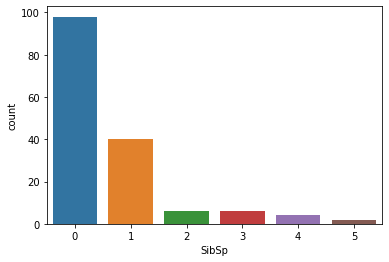

In [11]:
sns.countplot(x='SibSp',data=titanicdata)

In [12]:
titanicdata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

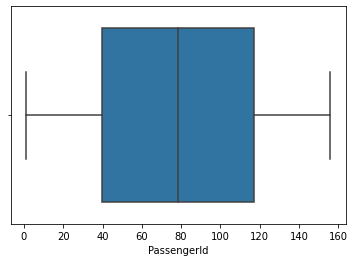

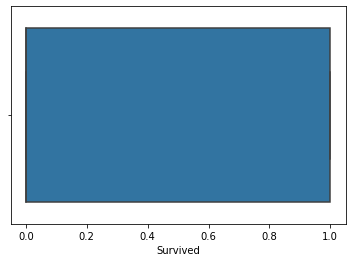

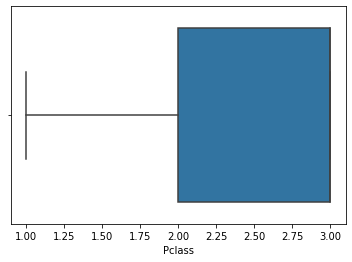

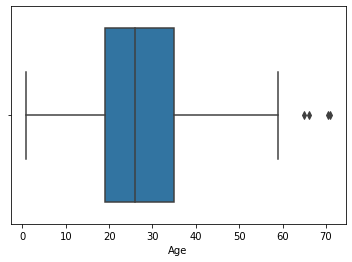

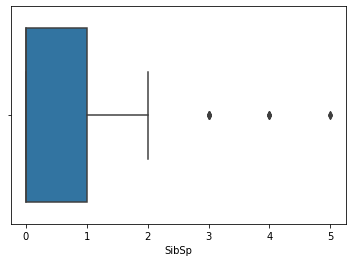

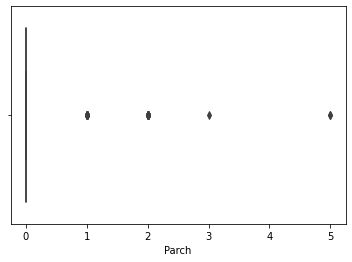

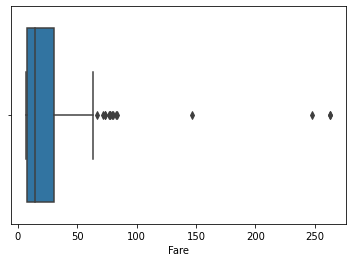

In [13]:
for i in titanicdata.columns :
 
  if titanicdata[i].dtype != object :
   
   sns.boxplot(x = titanicdata[i] , data = titanicdata )
   plt.show()


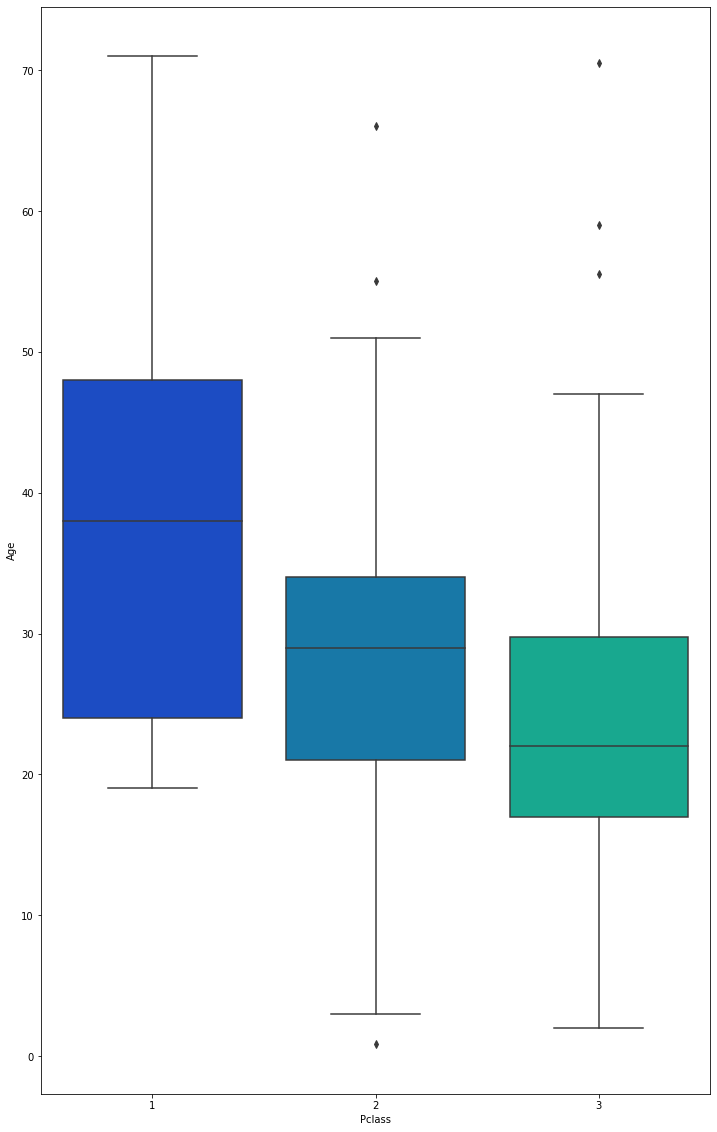

In [14]:
plt.figure(figsize=(12, 20))
sns.boxplot(x='Pclass',y='Age',data=titanicdata,palette='winter')

In [15]:
c1 = (titanicdata['Pclass']==3)&(titanicdata['Age']>42)
c2 = (titanicdata['Pclass']==2)&(titanicdata['Age']>50)
c3 = (titanicdata['Pclass']==2)&(titanicdata['Age']<8)

titanicdata['Age'] = np.select([c1,c2,c3],[23,27,27], titanicdata['Age'])

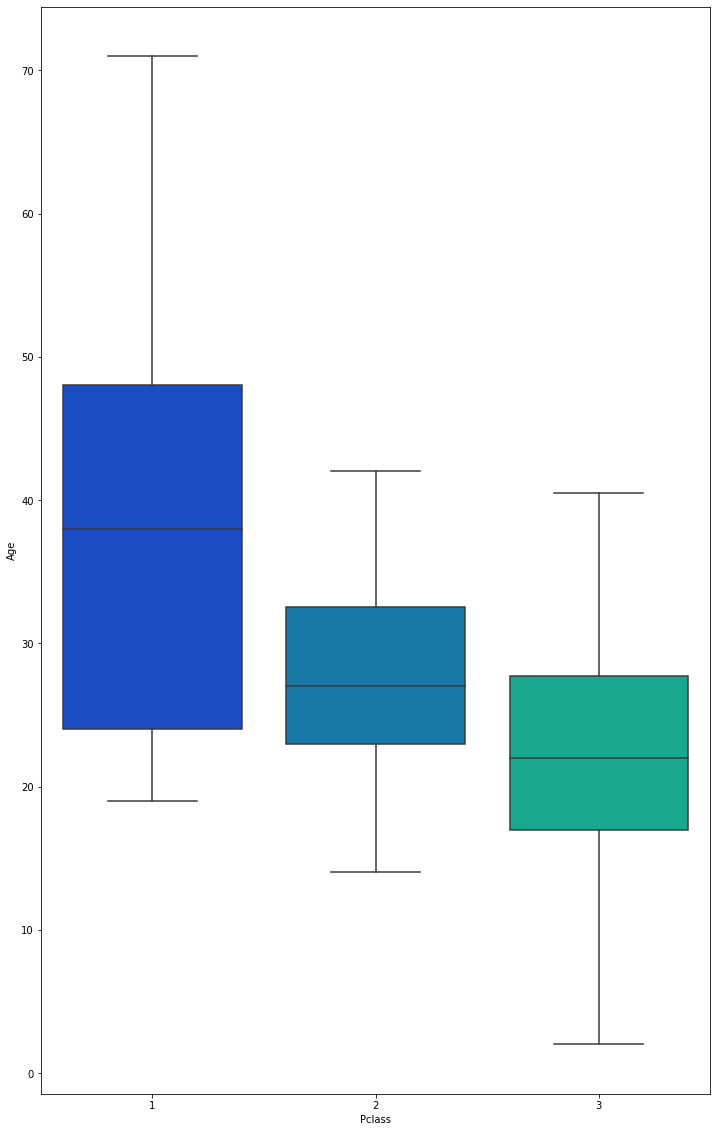

In [16]:
plt.figure(figsize=(12, 20))
sns.boxplot(x='Pclass',y='Age',data=titanicdata,palette='winter')

In [17]:
titanicdata.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [18]:
titanicdata.isnull().sum(
    
)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [19]:
titanicdata.Embarked.fillna(titanicdata.Embarked.mode()[0] , inplace = True)

In [20]:
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         0
dtype: int64

In [21]:
def impute_age(cols):
    Age2 = cols[0]
    Pclass2 = cols[1]
    
    if pd.isnull(Age2):

        if Pclass2 == 1:
            return titanicdata[titanicdata['Pclass']==1]['Age'].median()

        elif Pclass2 == 2:
            return titanicdata[titanicdata['Pclass']==2]['Age'].median()

        else:
            return titanicdata[titanicdata['Pclass']==3]['Age'].median()

    else:
        return Age2




In [22]:
titanicdata['Age'] = titanicdata[['Age','Pclass']].apply(impute_age , axis = 1)

In [23]:
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         0
dtype: int64

In [24]:
titanicdata.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [25]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       156 non-null    float64
 4   SibSp     156 non-null    int64  
 5   Parch     156 non-null    int64  
 6   Fare      156 non-null    float64
 7   Embarked  156 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 9.9+ KB


In [26]:
titanicdata.Embarked.value_counts()

S    111
C     32
Q     13
Name: Embarked, dtype: int64

In [27]:
titanicdata.Sex.value_counts()

male      100
female     56
Name: Sex, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
titanicdata.Sex = le.fit_transform(titanicdata.Sex)

In [31]:
titanicdata.Sex.value_counts()

1    100
0     56
Name: Sex, dtype: int64

In [32]:
le1 = LabelEncoder()

In [33]:
titanicdata.Embarked = le.fit_transform(titanicdata.Embarked)

In [34]:
titanicdata.Embarked.value_counts()

2    111
0     32
1     13
Name: Embarked, dtype: int64

In [35]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    int64  
 3   Age       156 non-null    float64
 4   SibSp     156 non-null    int64  
 5   Parch     156 non-null    int64  
 6   Fare      156 non-null    float64
 7   Embarked  156 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 9.9 KB


In [36]:
titanicdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [37]:
 from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
titanicdata[['Age','Fare']] = sc.fit_transform(titanicdata[['Age','Fare']])

In [40]:
titanicdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.377625,1,0,-0.531122,2
1,1,1,0,1.081434,1,0,1.099279,0
2,1,3,0,-0.012860,0,0,-0.513935,2
3,1,1,0,0.807860,1,0,0.636300,2
4,0,3,1,0.807860,0,0,-0.510753,2


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = titanicdata.drop(['Survived'], axis = 1 )

In [43]:
Y = titanicdata[['Survived']]

In [44]:
xtrain , xtest , ytrain , yest = train_test_split(X, Y ,random_state = 1)

In [45]:
from sklearn.linear_model import LogisticRegression 

In [46]:
logReg = LogisticRegression()

In [47]:
logReg.fit(xtrain , ytrain )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [48]:
logReg.score( xtest , yest)

0.8974358974358975

In [49]:
yped = logReg.predict(xtest)

In [50]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [51]:
accuracy_score(yped ,yest)

0.8974358974358975

In [53]:
print( classification_report(yped ,yest))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.77      0.91      0.83        11

    accuracy                           0.90        39
   macro avg       0.87      0.90      0.88        39
weighted avg       0.91      0.90      0.90        39



In [54]:
confusion_matrix(yped ,yest)

array([[25,  3],
       [ 1, 10]])